In [1]:
import numpy as np
from matplotlib import pyplot as plt
from my_utils import *
from sigproc_kit import *

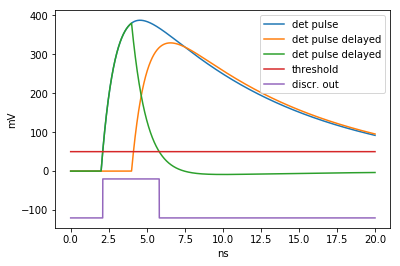

t1 : 2.106 ns, tot : 3.712 ns


In [2]:
##################################################
##             basic discriminator              ##
##################################################

delay=2e-9

t = np.linspace(0,20e-9,10000) # be sure to make not to few steps, if you have a sharp IR

tail_cancel_factor =0.85

tau1 = 1e-9
tau2 = 10e-9
y =  detector_signal_function(t, 100e-12, tau1, tau2, 2e-9)
yd = detector_signal_function(t, 100e-12, tau1, tau2, 2e-9+delay)*tail_cancel_factor

ydiff = y-yd

thresh = 50e-3

discr, t1, tot = discriminate(t,ydiff,thresh)

plt.plot(t*1e9,y*1e3,label="det pulse")
plt.plot(t*1e9,yd*1e3,label="det pulse delayed")
plt.plot(t*1e9,ydiff*1e3,label="det pulse delayed")
plt.plot(t*1e9,y*0+thresh*1e3,label="threshold")
plt.plot(t*1e9,discr*100-120,label="discr. out")
plt.xlabel("ns")
plt.ylabel("mV")
plt.legend()
plt.show()

print("t1 : {:3.3f} ns, tot : {:3.3f} ns".format(t1*1e9,tot*1e9))

In [9]:
t1_list=[]
tot_list=[]
thr_list=[]

min_thr = np.max(ydiff)*0.05
max_thr = np.max(ydiff)*0.95

for thr in np.linspace(min_thr,max_thr,20):
    discr, t1, tot = discriminate(t,ydiff,thr)
    t1_list  += [t1]
    tot_list += [tot]
    thr_list += [thr]

t1 = np.array(t1_list)
tot = np.array(tot_list)
t2 = t1 +tot
thr = np.array(thr_list)

0.43799136414048373
0.11093656380328817


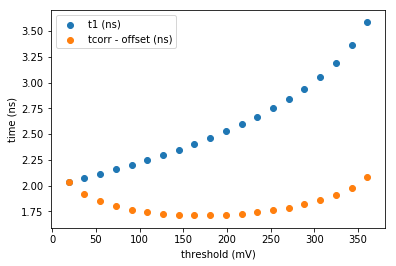

In [10]:
# correction
t2factor=0.6
tc = (t1+t2*t2factor)/2


plt.scatter(thr*1e3,t1*1e9,label="t1 (ns)")
tcc = tc - tc[0] + t1[0]
plt.scatter(thr*1e3,tcc*1e9,label="tcorr - offset (ns)")
plt.xlabel("threshold (mV)")
plt.ylabel("time (ns)")
plt.legend()

print(np.std(t1)*1e9)
print(np.std(tcc)*1e9)

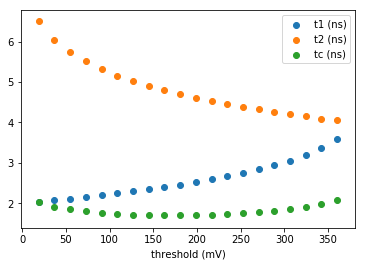

In [11]:
plt.scatter(thr*1e3,t1*1e9,label="t1 (ns)")
plt.scatter(thr*1e3,t2*1e9,label="t2 (ns)")
plt.scatter(thr*1e3,tcc*1e9,label="tc (ns)")
plt.xlabel("threshold (mV)")
plt.legend()